In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def filtering_mask(image, mask): #smoothing filter
  sr = mask.shape[0]//2
  sc = mask.shape[1]//2
  
  ir = image.shape[0]
  ic = image.shape[1]
  
  ni = np.zeros((ir + 2*sr, ic + 2*sc), np.float32)
  ni[sr:sr + ir, sc: sc + ic] = image
  
  ans = np.zeros(ni.shape)
  
  for i in range(sr, sr + ir):
    for j in range(sc, sc + ic):
      aux = ni[i - sr: sr + i + 1, j - sc: sc + j + 1]
      ans[i,j] = np.sum(aux*mask)
  
  return ans[sr: sr + ir, sc: sc + ic]

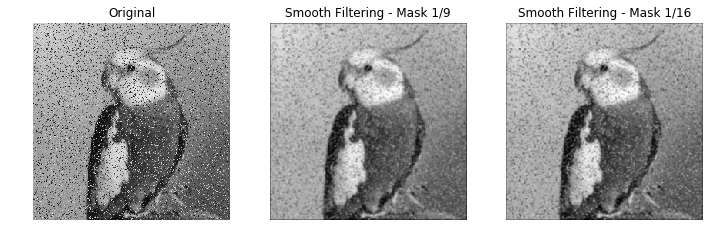

In [119]:
img = cv2.imread("lorito.jpg", 0)
mask = (1/9)*np.ones((3,3))
mask_ = np.array([[1,2,1], [2,4,2], [1,2,1]])
mask_ = (1/16)*mask_
im_f1 = filtering_mask(img, mask)
im_f2 = filtering_mask(img, mask_)

plt.figure(figsize=[12,12])
plt.subplot(1,3,1), plt.imshow(img, cmap = "gray") , plt.axis("off"), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(im_f1, cmap = "gray"), plt.axis("off"), plt.title("Smooth Filtering - Mask 1/9")
plt.subplot(1,3,3), plt.imshow(im_f2, cmap = "gray"), plt.axis("off"), plt.title("Smooth Filtering - Mask 1/16")
plt.show()

In [0]:
def filtering_Median(image, size): #nonlinear filtering
  sr = int(size/2)
  sc = int(size/2)
  
  ir = image.shape[0]
  ic = image.shape[1]
  
  ni = np.zeros((ir + 2*sr, ic + 2*sc), np.float32)
  ni[sr:sr + ir, sc: sc + ic] = image
  
  ans = np.zeros(ni.shape)
  
  for i in range(sr, sr + ir):
    for j in range(sc, sc + ic):
      aux = ni[i - sr: sr + i + 1, j - sc: sc + j + 1]
      val = np.sort(aux.flatten())
      ans[i,j] = val[(size*size)//2]
  return ans[sr: sr + ir, sc: sc + ic]

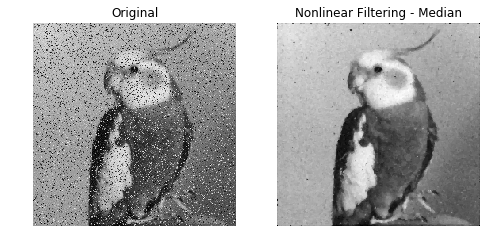

In [105]:
im_media = filtering_Median(img, 3)
plt.figure(figsize=[8,6])
plt.subplot(1,2,1), plt.imshow(img, cmap = "gray") , plt.axis("off"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(im_media, cmap = "gray"), plt.axis("off"), plt.title("Nonlinear Filtering - Median")
plt.show()

In [0]:
def placiano(img, mask_pl):
  laplaciano = filtering_mask(img, mask_pl) # enhancement filter -> highlight details
  out = img - laplaciano
  plt.figure(figsize=[8,6])
  np.clip(out, 0, 255, out = out)
  out = out.astype('uint8')
  return out

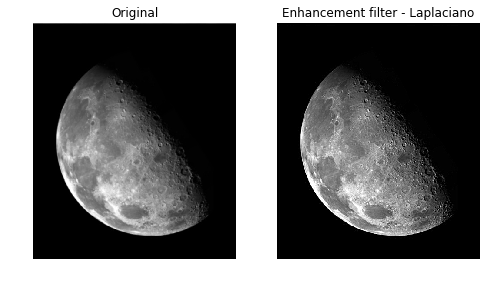

In [123]:
mask_pl = np.array([[0,1,0], [1,-4,1], [0,1,0]])
img = cv2.imread("moon.jpg", 0)
out = placiano(img, mask_pl)

plt.subplot(1,2,1), plt.imshow(img, cmap = "gray") , plt.axis("off"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(out, cmap = "gray"), plt.axis("off"), plt.title("Enhancement filter - Laplaciano")
plt.show()

In [0]:
def padding(image, n, m):
  mask = np.zeros((n, m))
  sr = n//2
  sc = m//2
  
  ir = image.shape[0]
  ic = image.shape[1]
  
  ni = np.zeros((ir + 2*sr, ic + 2*sc), np.float32)
  ni[sr:sr + ir, sc: sc + ic] = image
  
  ans = np.zeros(ni.shape)
  
  for i in range(sr, sr + ir):
    for j in range(sc, sc + ic):
      mask = img[i - sr: sr + i + 1, j - sc: sc + j + 1]
      aux = ni[i - sr: sr + i + 1, j - sc: sc + j + 1]
      ans[i,j] = np.sum(aux*mask)
  
  return ans[sr: sr + ir, sc: sc + ic]


In [139]:
img = cv2.imread("moon.jpg", 0)
out = padding(img, 3, 3)

plt.subplot(1,2,1), plt.imshow(img, cmap = "gray") , plt.axis("off"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(out, cmap = "gray"), plt.axis("off"), plt.title("Enhancement filter - Laplaciano")
plt.show()

ValueError: ignored